# Decision Tree Regression
## By Giriraj Vaishnav

In [1]:
# Import Packages, Function and Classes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
# Read the IceCreamData.csv file

IceCream=pd.read_csv('IceCreamData.csv')
print(IceCream)

     Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]


In [3]:
# Print first 5 data

IceCream.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
# Print last 5 data

IceCream.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [5]:
# Print mathematical description

IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
# Print information of Dataset

IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
# Divide the data into “Attributes” and “labels”

X = IceCream[['Temperature']]
y = IceCream['Revenue']

In [8]:
# Split 80% of the data to the training set while 20% of the data to test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# Create a Model and Train it

dtReg=DecisionTreeRegressor()
dtReg.fit(X_train,y_train)

DecisionTreeRegressor()

In [10]:
# Predicting the data

y_predict = dtReg.predict(X_test)
print(y_predict)

[690.7892959  639.5380115  682.8085663  475.2133537  655.6603879
 427.2113597  571.4342569  643.6486011  655.6603879  458.860905
 501.34533    443.1136034  654.1974057  362.5152155  367.0523757
 969.2916296  905.4776043  691.9580059  501.34533    402.7931738
 383.9562396  621.9692088  278.7319615  726.2337713  402.4553204
 441.5087331  356.0980075  505.7438672  437.2519927  459.7353497
 651.5043041  280.5184674  306.0907189  496.0112948  578.3604354
 543.5995933  319.4029032  545.9039291  538.31289    711.1740653
 437.8287103  499.4583433  594.3116748  467.631063   926.0671533
 570.5778753  543.5995933  216.183462   691.9580059  334.4337199
 221.400252   594.8048712  198.1215634  448.9304429  429.4357021
 402.3984607  503.0842679  809.6720534  344.6887652  543.5995933
 631.3182368  507.900282   381.8030138  454.1892673  634.5847506
 228.9010303  316.2401944  493.1154676  607.8391938  633.5040087
 759.3774317  190.7109408  591.1733898  242.5098553  425.0120182
 646.2669458  682.8085663 

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand (Training)')

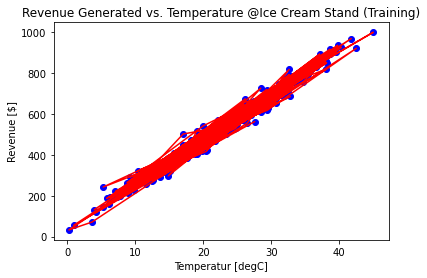

In [11]:
# Scatter plot on Training Data

plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,dtReg.predict(X_train),color='red')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperatur [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand (Training)')

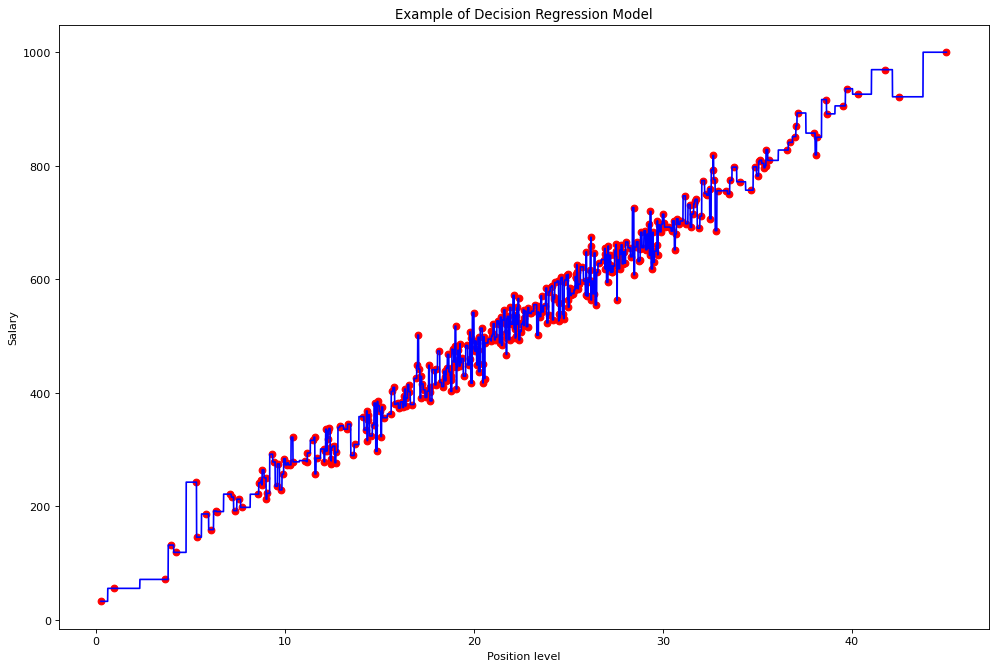

In [12]:
# Visualising the Regression results (for higher resolution and smoother curve)

X_grid = np.arange(min(X_train.values), max(X_train.values), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize=(15, 10), dpi=80)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, dtReg.predict(X_grid), color = 'blue')
plt.title('Example of Decision Regression Model')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [13]:
# Prediction the revenve using Temperature Value directly

print('---------0---------')
Temp = -0
Revenue = dtReg.predict([[Temp]])
print(Revenue)
print('--------35----------')
Temp = 35
Revenue = dtReg.predict([[Temp]])
print(Revenue)
print('--------55----------')
Temp = 55
Revenue = dtReg.predict([[Temp]])
print(Revenue)

---------0---------
[32.54661902]
--------35----------
[781.9837945]
--------55----------
[1000.]


In [14]:
# Getting Error in this Model

y_pred = dtReg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error : ", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 Score : ", r2)

Root Mean Square Error :  32.91690043492387
R2 Score :  0.9666304858535445
